# **Thresholding based Image Segmenatation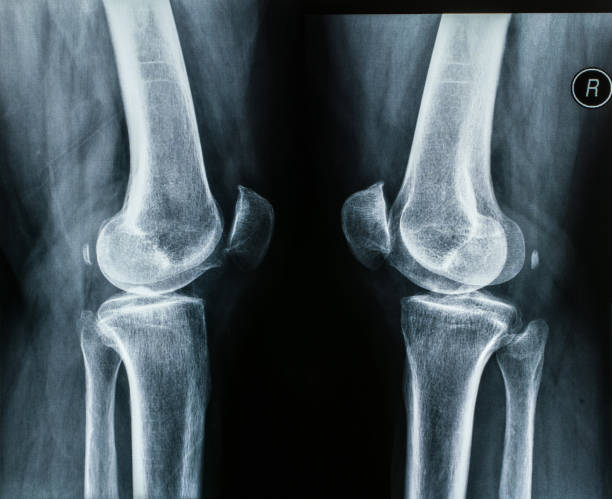**

#**(i) Simple Thresholding **

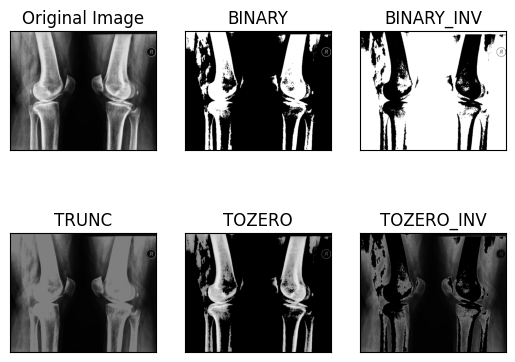

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/Xray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])

plt.show()

# ** (ii) Adaptive Thresholding**

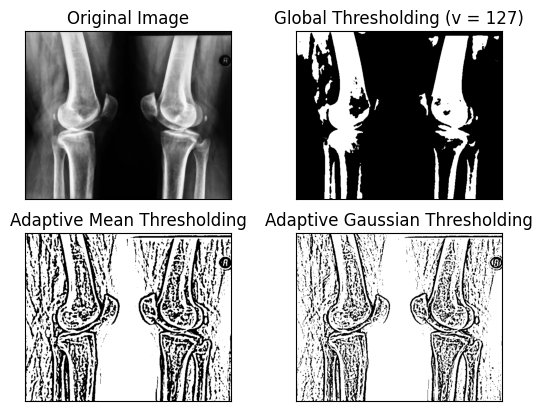

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/Xray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# **(iii) Otsu's Binarization**

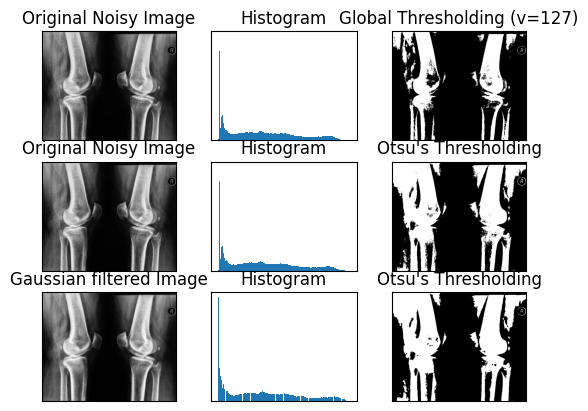

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/Xray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
 'Original Noisy Image','Histogram',"Otsu's Thresholding",
 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# **Edge-based segmentation**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

original_img = cv2.imread('/content/Xray.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)

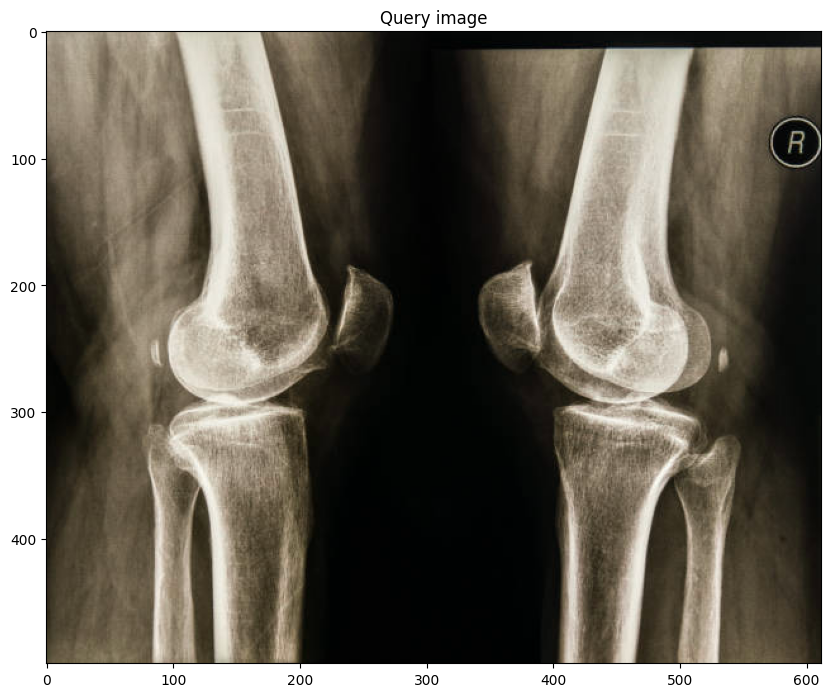

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(original_img)
plt.title("Query image")
plt.show()

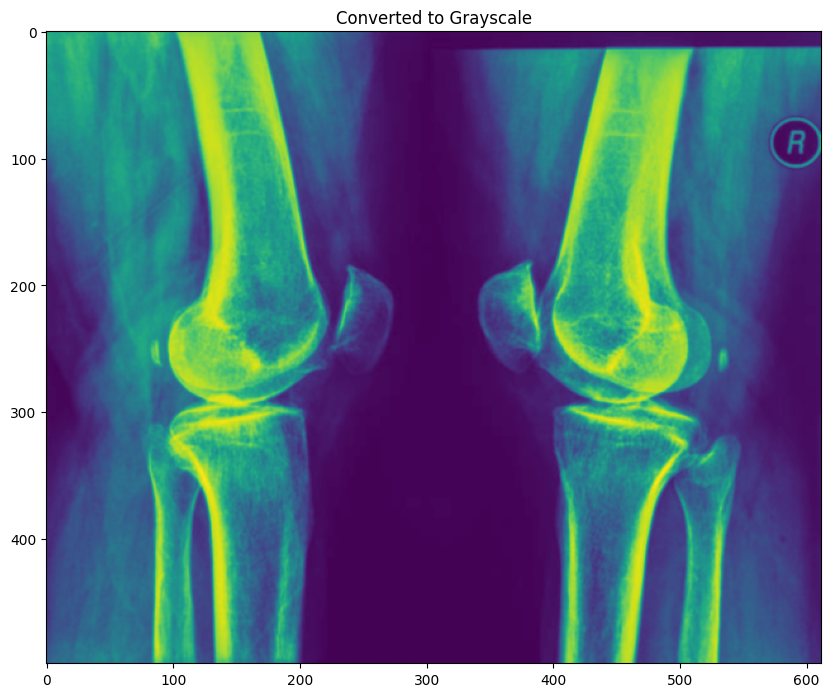

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(blur_img)
plt.title("Converted to Grayscale")
plt.show()

# **(i) Sobel Edge Detection**

In [ ]:
sobelx = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
filtered_image_x = cv2.convertScaleAbs(sobelx)

sobely = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
filtered_image_y = cv2.convertScaleAbs(sobely)

sobelxy = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_image_xy = cv2.convertScaleAbs(sobelxy)

In [ ]:
plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(blur_img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(222)
plt.imshow(filtered_image_x, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(223)
plt.imshow(filtered_image_y, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

plt.subplot(224)
plt.imshow(filtered_image_xy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **(ii) Canny Edge Detection**

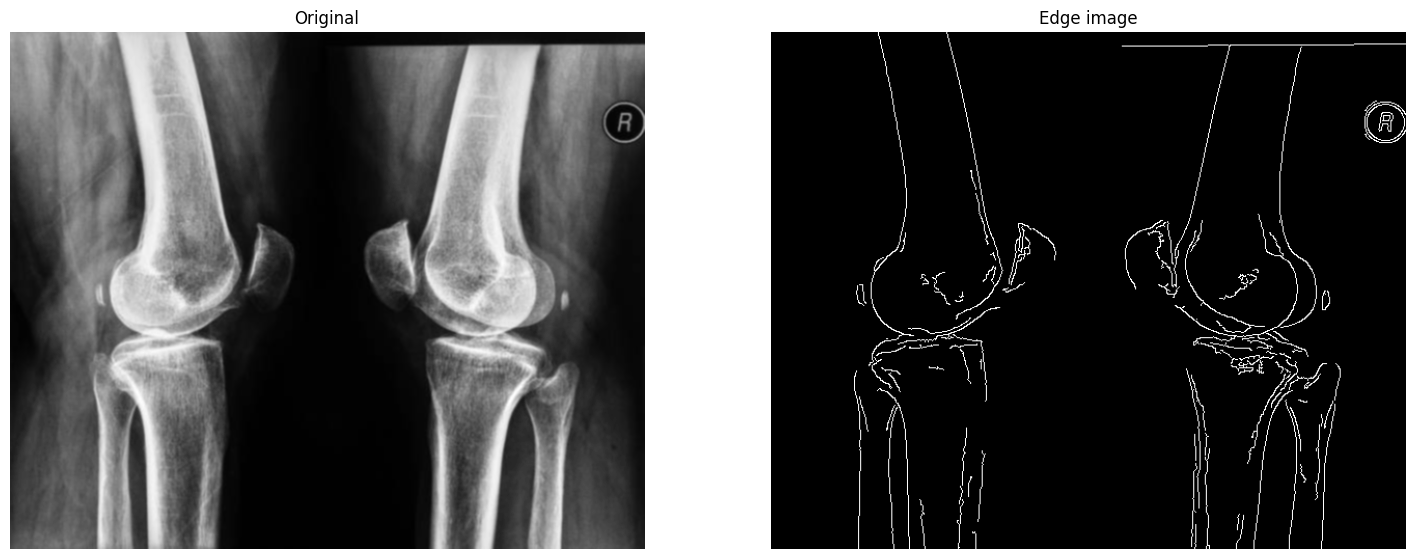

In [ ]:
edges = cv2.Canny(image=blur_img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")
plt.show()

# **(iii) Laplacian Edge Detection**

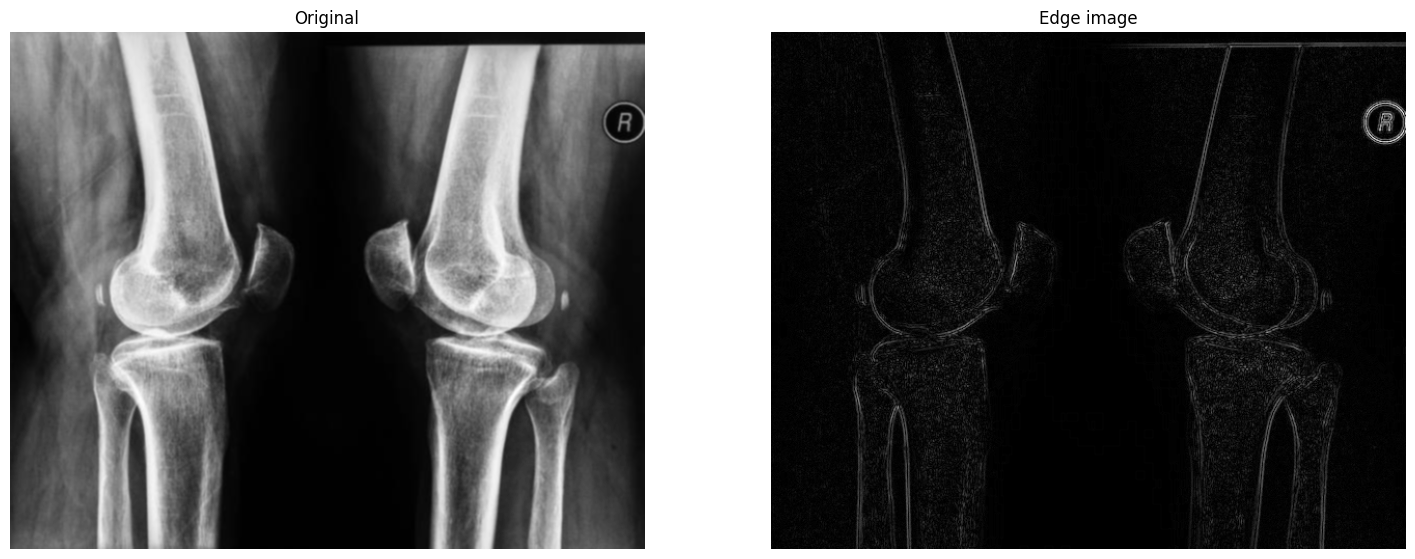

In [ ]:
laplacian = cv2.Laplacian(blur_img,5,cv2.CV_64F)
filtered_image = cv2.convertScaleAbs(laplacian)
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('Edge image')
plt.axis("off")
plt.show()

In [ ]:
# Edge based Segmentation - write 6 - colab link